In [1]:
#Add necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date", parse_dates =True)

#Clean Data
df= df[(df['value']>df['value'].quantile(0.025)) & (df['value']<=df['value'].quantile(0.975))]



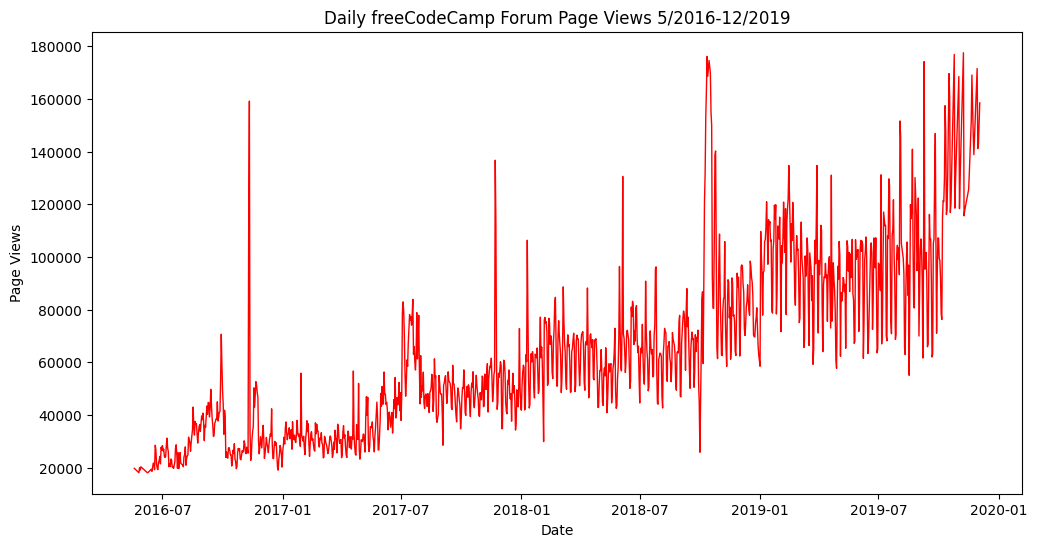

In [7]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(12,6)) #sets the canvas 
    #Plot index(the dates) in X axis and corresponding values in Y axis.
    ax.plot(df.index, df["value"], color='red', linewidth=1) 

    # Set labels and title
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    
    # Save image and return fig
    fig.savefig('line_plot.png')

    plt.close(fig)
    return fig


draw_line_plot()

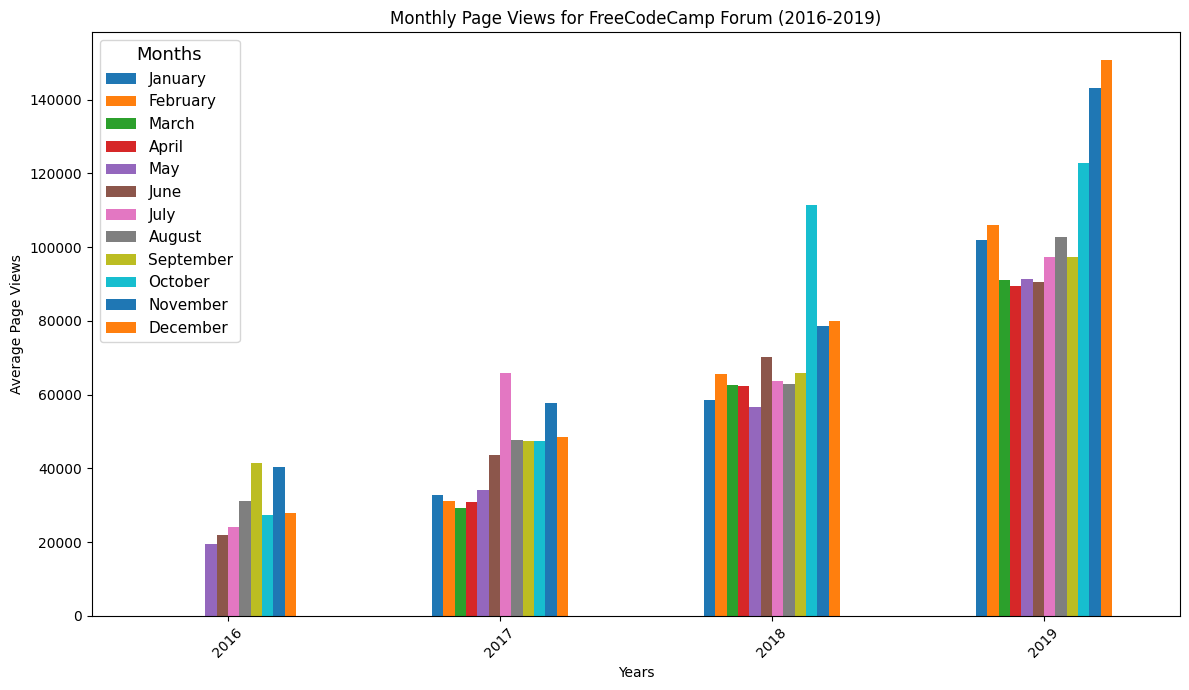

In [13]:
def draw_bar_plot():
    df_bar = df.copy()
    # Resample the data by month, computing the mean value for each month
    df_clean = df.resample('ME').mean()

    # Extract the year and month from the index and adding it to the sampled df
    df_clean['year'] = df_clean.index.year
    df_clean['month'] = df_clean.index.month_name()

    monthly_avg = df_clean.groupby(['year', 'month'])['value'].sum().unstack()
    fig, ax = plt.subplots(figsize=(12, 7))

    # Plotting each month's data for every year
    month_colors = {
    'January': '#1F77B4',
    'February': '#FF7F0E',
    'March': '#2CA02C',
    'April': '#D62728',
    'May': '#9467BD',
    'June': '#8C564B',
    'July': '#E377C2',
    'August': '#7F7F7F',
    'September': '#BCBD22',
    'October': '#17BECF',
    'November': '#1F77B4',
    'December': '#FF7F0E'
    }

    # Arranging monthly_avg by Jan-Dec order rather than default alphabetical order
    monthly_avg = monthly_avg[month_colors.keys()]

    # Plot
    monthly_avg.plot(kind='bar', stacked=False, ax=ax, color=month_colors.values())
    
    # Set the title and labels
    plt.title("Monthly Page Views for FreeCodeCamp Forum (2016-2019)")
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title="Months", title_fontsize='13', fontsize='11')

    # Show the plot
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    
    plt.close(fig)
    return fig

draw_bar_plot()

In [14]:
def draw_box_plot():
    # Prepare data for box plots (this part is already done by course creators!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    # Define color palettes
    year_colors = {
        2016: '#3274a1',
        2017: '#e1812c',
        2018: '#3a923a',
        2019: '#c03d3e'
    }

    month_colors = {
        'Jan': '#ea96a3', 'Feb': '#e19153', 'Mar': '#b89c49', 'Apr': '#98a246',
        'May': '#60ae47', 'Jun': '#4aae8a', 'Jul': '#4baba4', 'Aug': '#4fabbc',
        'Sep': '#6daee2', 'Oct': '#b6a8eb', 'Nov': '#df8fe7', 'Dec': '#e890c6'
    }

    # Create figure and axes
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))

    # Year-wise Box Plot (Trend)
    sns.boxplot(data=df_box, x='year', y='value', ax=ax[0], hue='year', 
                palette=year_colors, 
                flierprops={"marker": 'd', "markersize": 3, "markerfacecolor": "black"})
    ax[0].set_title("Year-wise Box Plot (Trend)")
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("Page Views")
    ax[0].legend(title="Year")

    # Month-wise Box Plot (Seasonality)
    sns.boxplot(data=df_box, x='month', y='value', ax=ax[1], order=month_colors.keys(), hue='month', 
                palette=month_colors, 
                flierprops={"marker": 'd', "markersize": 3, "markerfacecolor": "black"})
    ax[1].set_title("Month-wise Box Plot (Seasonality)")
    ax[1].set_xlabel("Month")
    ax[1].set_ylabel("Page Views")
    ax[1].legend(title="Month")

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    plt.clo
    return fig
